In [7]:
import numpy as np
import sklearn
from sklearn import datasets, model_selection, metrics
import matplotlib.pyplot as plt

# Importing our from scratch models
from decision_tree import DecisionTree
from random_forest import RandomForestClassifier
from adaboost import AdaBoostClassifier

# DecisionTree Examples

## Training on Iris Dataset

In [2]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)
iris_feature_names = iris.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (112, 4)
Train Shape: (38, 4)


In [4]:
# Building the tree
my_tree = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0)
my_tree.train(X_train, Y_train)

In [5]:
# Let's see the tree
my_tree.print_tree()

                                                                -> LEAF | Label Counts = 0.0->1 | Pred Probs = [1. 0. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 4.4 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->8 | Pred Probs = [1. 0. 0.]
                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 4.775 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->6 | Pred Probs = [1. 0. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 5.0 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->21 | Pred Probs = [1. 0. 0.]
                -> NODE | Information Gain = 0.6731015728685515 | Split IF X[3] < 0.525 THEN left O/W right
                                                

In [6]:
# Let's see the Train performance
train_preds = my_tree.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Train Accuracy", sum(train_preds == Y_train) / len(Y_train))

TRAIN PERFORMANCE
Train size 112
True preds 109
Train Accuracy 0.9732142857142857


In [7]:
# Let's see the Test performance
test_preds = my_tree.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TEST PERFORMANCE
Test size 38
True preds 35
Accuracy 0.9210526315789473


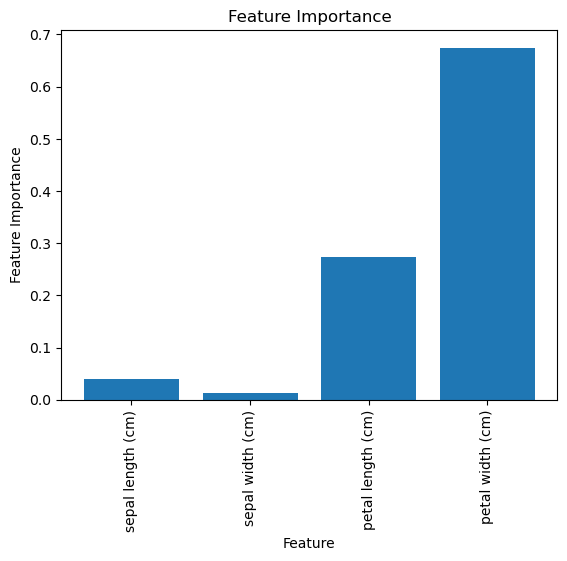

In [8]:
# Feature importance
plt.bar(range(len(my_tree.feature_importances)), 
        list(my_tree.feature_importances.values()), tick_label=iris_feature_names)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.show()

## Training on Breast Cancer Dataset

In [9]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
Y = data.target
breast_cancer_feature_names = data.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (455, 30)
Train Shape: (114, 30)


In [10]:
# Building the tree
my_tree_2 = DecisionTree(max_depth=4, min_samples_leaf=5, min_information_gain=0.05)
my_tree_2.train(X_train, Y_train)

In [11]:
my_tree_2.print_tree()

                                -> LEAF | Label Counts = 0.0->6, 1.0->249 | Pred Probs = [0.02352941 0.97647059]
                -> NODE | Information Gain = 0.24446648320004927 | Split IF X[27] < 0.112 THEN left O/W right
                                                                -> LEAF | Label Counts = 1.0->16 | Pred Probs = [0. 1.]
                                                -> NODE | Information Gain = 0.20443400292496505 | Split IF X[26] < 0.24924999999999997 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->24, 1.0->24 | Pred Probs = [0.5 0.5]
                                -> NODE | Information Gain = 0.28620952259378585 | Split IF X[27] < 0.177425 THEN left O/W right
                                                -> LEAF | Label Counts = 0.0->22 | Pred Probs = [1. 0.]
-> NODE | Information Gain = 0.4649825668927295 | Split IF X[20] < 18.409999999999997 THEN left O/W right
                -> LEAF | Label

In [12]:
# Let's see the Train performance
train_preds = my_tree_2.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Train Accuracy", sum(train_preds == Y_train) / len(Y_train))

TRAIN PERFORMANCE
Train size 455
True preds 424
Train Accuracy 0.9318681318681319


In [13]:
# Let's see the Test performance
test_preds = my_tree_2.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TEST PERFORMANCE
Test size 114
True preds 103
Accuracy 0.9035087719298246


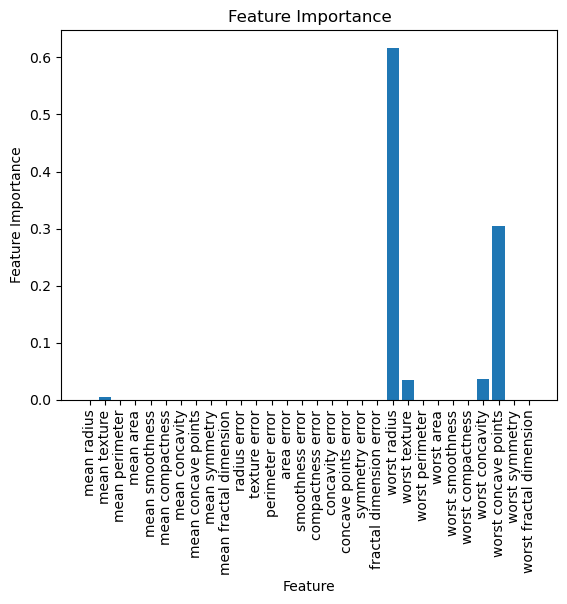

In [14]:
# Feature importance
plt.bar(range(len(my_tree_2.feature_importances)), 
        list(my_tree_2.feature_importances.values()), tick_label=breast_cancer_feature_names)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

## Training on Diabetes Data (from OpenML)

In [15]:
diabetes = datasets.fetch_openml(name="diabetes", as_frame=False)

/Users/eno/opt/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/eno/opt/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
diabetes_features = np.array(diabetes.data)
print(diabetes_features.shape)
diabetes_labels = np.array([y=="tested_positive" for y in diabetes.target]).astype(int)
print(diabetes_labels.shape)

(768, 8)
(768,)


In [17]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes_features, diabetes_labels, test_size=0.2, random_state=0)

In [18]:
# Lets see how model performs with different max_depth thresholds

train_accuracy_dict = {}
test_accuracy_dict = {}
# depth_occured = {}

for depth in range(2, 21):
    tree_model = DecisionTree(max_depth=depth, min_samples_leaf=1)
    tree_model.train(X_train, Y_train)

    # depth_occured[depth] = tree_model.current_de

    # Train performance
    train_preds = tree_model.predict(X_set=X_train)
    train_accuracy = sum(train_preds == Y_train) / len(Y_train)
    train_accuracy_dict[depth] = train_accuracy

    # Test performance
    test_preds = tree_model.predict(X_set=X_test)
    test_accuracy = sum(test_preds == Y_test) / len(Y_test)
    test_accuracy_dict[depth] = test_accuracy

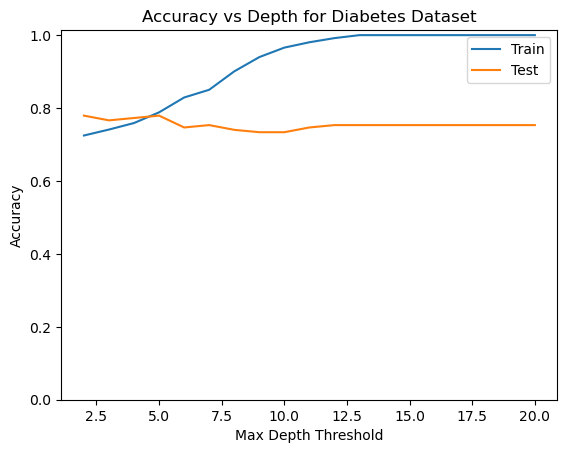

In [19]:
plt.plot(train_accuracy_dict.keys(), train_accuracy_dict.values(), label="Train")
plt.plot(test_accuracy_dict.keys(), test_accuracy_dict.values(), label="Test")
plt.title("Accuracy vs Depth for Diabetes Dataset")
plt.xlabel("Max Depth Threshold")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim(bottom=0.0)
plt.show()

#### We can see that the tree starts to overfit after max_depth exceeds 5

In [20]:
opt_tree_model = DecisionTree(max_depth=5, min_samples_leaf=1)
opt_tree_model.train(X_train, Y_train)

In [21]:
train_preds = opt_tree_model.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = opt_tree_model.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 614
True preds 484
Accuracy 0.7882736156351792
TEST PERFORMANCE
Test size 154
True preds 120
Accuracy 0.7792207792207793


In [22]:
opt_tree_model.print_tree()

                                                                -> LEAF | Label Counts = 0.0->9 | Pred Probs = [1. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 1.0 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->48 | Pred Probs = [1. 0.]
                                -> NODE | Information Gain = 0.025612122980204974 | Split IF X[6] < 0.526 THEN left O/W right
                                                                                -> LEAF | Label Counts = 0.0->3 | Pred Probs = [1. 0.]
                                                                -> NODE | Information Gain = 0.8112781244591328 | Split IF X[0] < 2.25 THEN left O/W right
                                                                                -> LEAF | Label Counts = 1.0->1 | Pred Probs = [0. 1.]
                                                -> NODE | Information Gain = 0.12414133

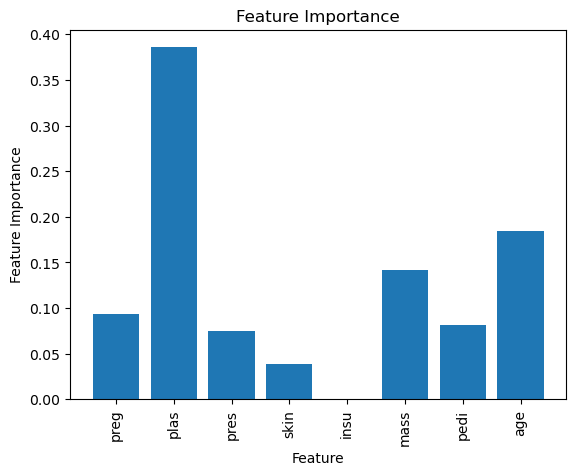

In [23]:
# Feature importance
plt.bar(range(len(opt_tree_model.feature_importances)), 
        list(opt_tree_model.feature_importances.values()), tick_label=diabetes.feature_names)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

# Random Forest Examples

## Training on Iris Dataset

In [24]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)
iris_feature_names = iris.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (112, 4)
Train Shape: (38, 4)


In [25]:
# Building random forest model
rf_model = RandomForestClassifier(n_base_learner=50, numb_of_features_splitting="sqrt")
rf_model.train(X_train, Y_train)

In [26]:
# Performans increases when compared to the basic DecisionTree
train_preds = rf_model.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = rf_model.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 112
True preds 112
Accuracy 1.0
TEST PERFORMANCE
Test size 38
True preds 37
Accuracy 0.9736842105263158


## Training on Breast Cancer Dataset

In [27]:
# Load data
data = datasets.load_breast_cancer()
X = data.data
Y = data.target
breast_cancer_feature_names = data.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

Train Shape: (455, 30)
Train Shape: (114, 30)


In [28]:
# Building random forest model
rf_model_2 = RandomForestClassifier(n_base_learner=100, 
                                    max_depth=4, min_samples_leaf=5, min_information_gain=0.05)
rf_model_2.train(X_train, Y_train)

In [29]:
# Performans increases when compared to the basic DecisionTree
train_preds = rf_model_2.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = rf_model_2.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 455
True preds 445
Accuracy 0.978021978021978
TEST PERFORMANCE
Test size 114
True preds 110
Accuracy 0.9649122807017544


## Training on Diabetes Data (from OpenML)

In [30]:
diabetes = datasets.fetch_openml(name="diabetes", as_frame=False)

In [31]:
diabetes_features = np.array(diabetes.data)
print(diabetes_features.shape)
diabetes_labels = np.array([y=="tested_positive" for y in diabetes.target]).astype(int)
print(diabetes_labels.shape)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes_features, diabetes_labels, test_size=0.2, random_state=0)

(768, 8)
(768,)


In [32]:
rf_model_3 = RandomForestClassifier(n_base_learner=200, numb_of_features_splitting=None,
                                     max_depth=5, min_samples_leaf=1)
rf_model_3.train(X_train, Y_train)

In [33]:
# Performance increases when compared to basic decision tree
train_preds = rf_model_3.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

test_preds = rf_model_3.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TRAIN PERFORMANCE
Train size 614
True preds 507
Accuracy 0.8257328990228013
TEST PERFORMANCE
Test size 154
True preds 123
Accuracy 0.7987012987012987


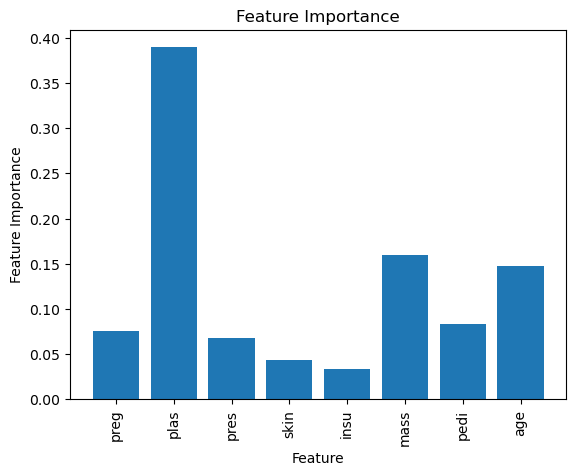

In [34]:
# Feature importance of RandomForest Model
plt.bar(range(len(rf_model_3.feature_importances)), 
        list(rf_model_3.feature_importances), tick_label=diabetes.feature_names)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

# AdaBoost Examples

## Training on Iris Dataset

In [6]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

model = AdaBoostClassifier(n_base_learner=50)
model.train(X_train, y_train)

train_accuracy = sum(model.predict(X=X_train) == y_train) / len(y_train)
test_accuracy = sum(model.predict(X=X_test) == y_test) / len(y_test)
print("Our Model Performance")
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


Our Model Performance
Train Accuracy:  0.95
Test Accuracy:  0.9666666666666667


In [11]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

model = sklearn.ensemble.AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)

train_accuracy = sum(model.predict(X=X_train) == y_train) / len(y_train)
test_accuracy = sum(model.predict(X=X_test) == y_test) / len(y_test)
print("Sklearn Model Performance")
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


Sklearn Model Performance
Train Accuracy:  0.9583333333333334
Test Accuracy:  0.9666666666666667


## Training on Breast Cancer Dataset

In [12]:
data = datasets.load_breast_cancer()

X = np.array(data.data)
Y = np.array(data.target)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

model = AdaBoostClassifier(n_base_learner=50)
model.train(X_train, y_train)

train_accuracy = sum(model.predict(X=X_train) == y_train) / len(y_train)
test_accuracy = sum(model.predict(X=X_test) == y_test) / len(y_test)
print("Our Model Performance")
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


Our Model Performance
Train Accuracy:  0.9560439560439561
Test Accuracy:  0.9649122807017544


In [13]:
data = datasets.load_breast_cancer()

X = np.array(data.data)
Y = np.array(data.target)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

model = sklearn.ensemble.AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)

train_accuracy = sum(model.predict(X=X_train) == y_train) / len(y_train)
test_accuracy = sum(model.predict(X=X_test) == y_test) / len(y_test)
print("Sklearn Model Performance")
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


Sklearn Model Performance
Train Accuracy:  1.0
Test Accuracy:  0.956140350877193


## Training on Diabetes Data (from OpenML)

In [14]:
diabetes = datasets.fetch_openml(name="diabetes", as_frame=False)
diabetes_features = np.array(diabetes.data)
print(diabetes_features.shape)
diabetes_labels = np.array([y=="tested_positive" for y in diabetes.target]).astype(int)
print(diabetes_labels.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes_features, diabetes_labels, test_size=0.2, random_state=0)

(768, 8)
(768,)


/Users/eno/opt/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/eno/opt/anaconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
model = AdaBoostClassifier(n_base_learner=50)
model.train(X_train, y_train)

train_accuracy = sum(model.predict(X=X_train) == y_train) / len(y_train)
test_accuracy = sum(model.predict(X=X_test) == y_test) / len(y_test)
print("Our Model Performance")
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Our Model Performance
Train Accuracy:  0.747557003257329
Test Accuracy:  0.7792207792207793


In [16]:
model = sklearn.ensemble.AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)

train_accuracy = sum(model.predict(X=X_train) == y_train) / len(y_train)
test_accuracy = sum(model.predict(X=X_test) == y_test) / len(y_test)
print("Sklearn Model Performance")
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


Sklearn Model Performance
Train Accuracy:  0.8175895765472313
Test Accuracy:  0.7792207792207793


## Some Simulations for Understanding the # of Base Learners in AdaBoost

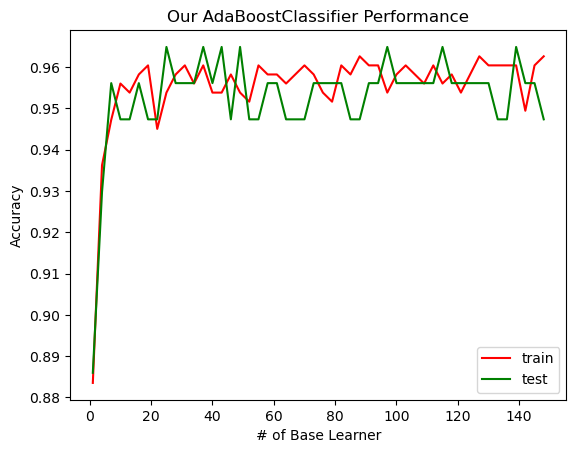

In [19]:
data = datasets.load_breast_cancer()

X = np.array(data.data)
Y = np.array(data.target)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0)

# model = AdaBoostClassifier(n_base_learner=10)
# model.train(X_train, y_train)

train_accuracy_list = []
test_accuracy_list = []
for n_base_learner in range(1, 150, 3):
    model = AdaBoostClassifier(n_base_learner)
    model.train(X_train, y_train)
    train_accuracy_list.append(sum(model.predict(X=X_train) == y_train) / len(y_train))
    test_accuracy_list.append(sum(model.predict(X=X_test) == y_test) / len(y_test))

plt.plot(list(range(1, 150, 3)), train_accuracy_list, color='red', label='train')
plt.plot(list(range(1, 150, 3)), test_accuracy_list, color='green', label='test')
plt.title("Our AdaBoostClassifier Performance")
plt.xlabel('# of Base Learner')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

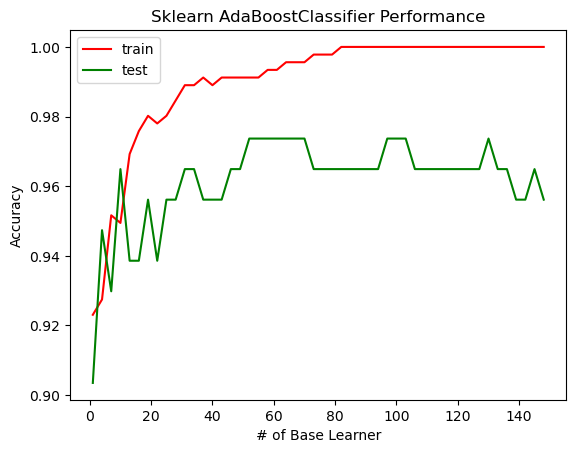

In [20]:
train_accuracy_list = []
test_accuracy_list = []
n_estimaters_list = []
for n_base_learner in range(1, 150, 3):
    model = sklearn.ensemble.AdaBoostClassifier(n_estimators=n_base_learner, learning_rate=0.2, random_state=0)
    model.fit(X_train, y_train)
    train_accuracy_list.append(sum(model.predict(X_train) == y_train) / len(y_train))
    test_accuracy_list.append(sum(model.predict(X_test) == y_test) / len(y_test))
    n_estimaters_list.append(len(model.estimators_))

plt.plot(list(range(1, 150, 3)), train_accuracy_list, color='red', label='train')
plt.plot(list(range(1, 150, 3)), test_accuracy_list, color='green', label='test')
plt.title("Sklearn AdaBoostClassifier Performance")
plt.xlabel('# of Base Learner')
plt.ylabel('Accuracy')
plt.legend()
plt.show()